In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [3]:
state_abv = {
    '2': 'AK',
    '1': 'AL',
    '5': 'AR',
    '4': 'AZ',
    '6': 'CA',
    '8': 'CO',
    '9': 'CT',
    '11': 'DC',
    '10': 'DE',
    '12': 'FL',
    '13': 'GA',
    '15': 'HI',
    '19': 'IA',
    '16': 'ID',
    '17': 'IL',
    '18': 'IN',
    '20': 'KS',
    '21': 'KY',
    '22': 'LA',
    '25': 'MA',
    '24': 'MD',
    '23': 'ME',
    '26': 'MI',
    '27': 'MN',
    '29': 'MO',
    '28': 'MS',
    '30': 'MT',
    '37': 'NC',
    '38': 'ND',
    '31': 'NE',
    '33': 'NH',
    '34': 'NJ',
    '35': 'NM',
    '32': 'NV',
    '36': 'NY',
    '39': 'OH',
    '40': 'OK',
    '41': 'OR',
    '42': 'PA',
    '44': 'RI',
    '45': 'SC',
    '46': 'SD',
    '47': 'TN',
    '48': 'TX',
    '49': 'UT',
    '51': 'VA',
    '50': 'VT',
    '53': 'WA',
    '55': 'WI',
    '54': 'WV',
    '56': 'WY'}

In [4]:
test_state_abv = {
    '2': 'AK',
    '1': 'AL',
    '5': 'AR',
    '4': 'AZ'}

In [5]:
comstock_buildings = ['quickservicerestaurant',
                      'fullservicerestaurant',
                      'smalloffice',
                      'mediumoffice',
                      'largeoffice',
                      'warehouse',
                      'smallhotel',
                      'largehotel',
                      'outpatient',
                      'hospital',
                      'secondaryschool',
                      'primaryschool',
                      'retailstandalone',
                      'retailstripmall']

In [6]:
test_comstock_buildings = ['smalloffice']

In [7]:
upgrades = ['17','18']
test_upgrades = ['17']

In [8]:
def analyze_energy_savings(df):
     # Filter the DataFrame to include only rows where 'applicability' is TRUE
    # and create a copy to avoid SettingWithCopyWarning when modifying the DataFrame
    filtered_df = df[df['applicability'] == True].copy()
    
    # Use .loc[] to safely modify the specific column of interest
    column_name = 'calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'
    filtered_df.loc[:, column_name] *= 100
    
    # Compute summary statistics for the specified column
    summary_stats = filtered_df['calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'].describe()
    
    # Print summary statistics
    print(summary_stats)
    
    # Plot the histogram for the specified column
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    plt.hist(filtered_df['calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Site Energy Total Energy Consumption Intensity Percent Savings (Applicable=True)')
    plt.xlabel('Percent Savings (%)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage (assuming 'df' is your DataFrame loaded elsewhere):
# analyze_energy_savings(df)


In [9]:
def plot_histogram_with_stats_and_fit(df):
     # Filter the DataFrame to include only rows where 'applicability' is TRUE
    # and create a copy to avoid SettingWithCopyWarning when modifying the DataFrame
    filtered_df = df[df['applicability'] == True].copy()
    
    # Use .loc[] to safely modify the specific column of interest
    column_name = 'calc.percent_savings.site_energy.total.energy_consumption_intensity..percent'
    data_series = filtered_df.loc[:, column_name] * 100
    
    mean_val = data_series.mean()
    median_val = data_series.median()
    std_val = data_series.std()
    min_val = data_series.min()
    max_val = data_series.max()

    # Fitting a normal distribution
    mu, std = norm.fit(data_series)

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(data_series, bins=30, color='blue', edgecolor='black', density=True)
    
    # Plotting the PDF of the fitted normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Adding summary statistics to the plot
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1)
    plt.legend({'Mean': mean_val, 'Median': median_val, 'Normal Fit': ''})

    plt.title(f'Histogram with Stats of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')

    # Displaying summary statistics
    plt.text(xmin, max(n)*0.8, f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}', 
             bbox=dict(facecolor='white', alpha=0.5))

    #plt.show()
    up = df['upgrade'].unique()[0]
    building = df['in.comstock_building_type'].unique()[0]
    state = df['in.state'].unique()[0]
    plt.savefig(f"plots/{up}_{building}_{state}_total_energy_percent_savings.png", bbox_inches='tight', dpi=300)
    plt.show()

In [10]:
df = pd.read_csv('annual_data/17/SmallOffice/NV/NV_df.csv')

count    517.000000
mean      25.492045
std       13.077344
min       -0.886463
25%       15.349582
50%       27.701355
75%       35.861968
max       52.894866
Name: calc.percent_savings.site_energy.total.energy_consumption_intensity..percent, dtype: float64


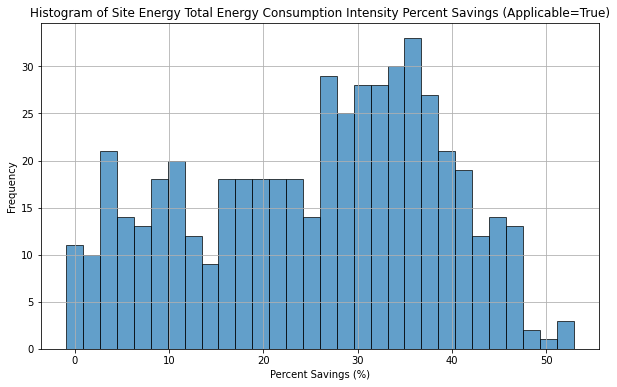

In [11]:
analyze_energy_savings(df)

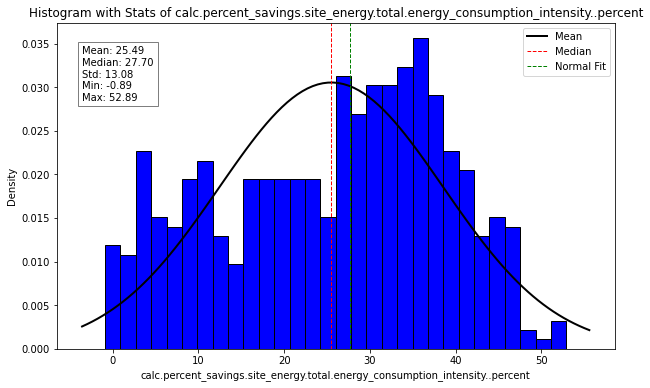

In [12]:
plot_histogram_with_stats_and_fit(df)

In [13]:
df = pd.read_csv('annual_data/17/SmallOffice/UT/UT_df.csv')

count    458.000000
mean      32.884612
std       14.931799
min       -7.739990
25%       25.952337
50%       36.794837
75%       44.121268
max       57.082347
Name: calc.percent_savings.site_energy.total.energy_consumption_intensity..percent, dtype: float64


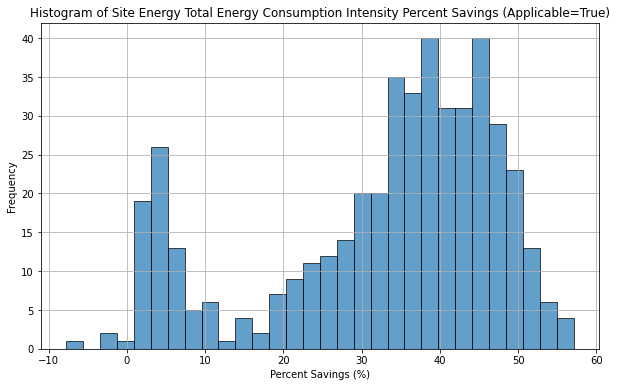

In [14]:
analyze_energy_savings(df)

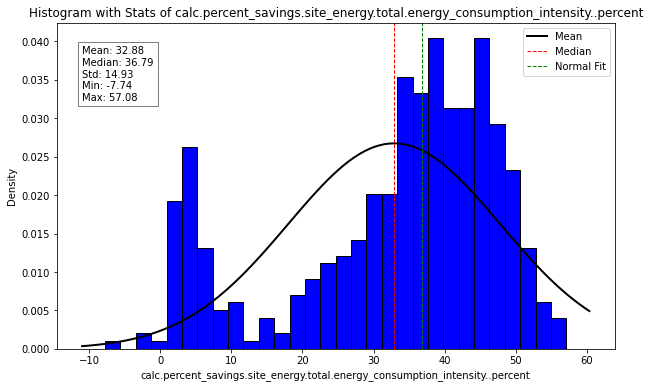

In [15]:
plot_histogram_with_stats_and_fit(df)

In [16]:
df = pd.read_csv('annual_data/17/SmallOffice/FL/FL_df.csv')

count    3934.000000
mean       19.710046
std        13.290772
min        -8.052459
25%         7.313089
50%        18.327726
75%        31.262080
max        54.999055
Name: calc.percent_savings.site_energy.total.energy_consumption_intensity..percent, dtype: float64


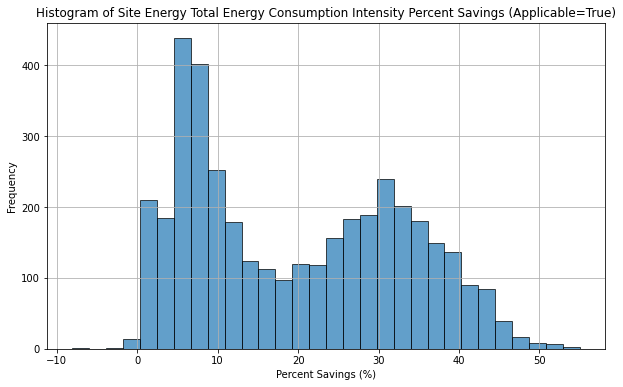

In [17]:
analyze_energy_savings(df)

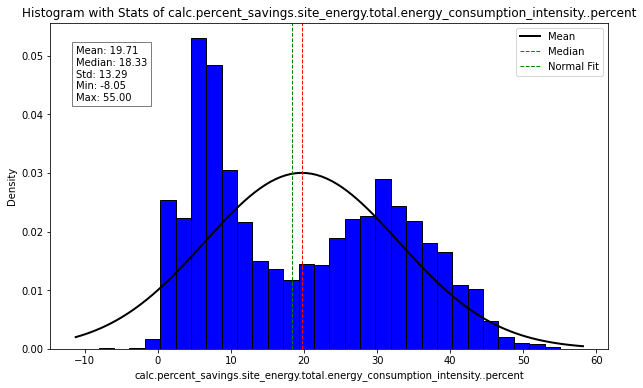

In [18]:
plot_histogram_with_stats_and_fit(df)

In [8]:
# Compute % savings
data_df['perc_elec_savings'] = 100 * data_df['sum.electricity.total.energy_consumption.kwh.savings'] / (
    data_df['sum.electricity.total.energy_consumption.kwh.savings'] + data_df['sum.electricity.total.energy_consumption.kwh'])

data_df['perc_gas_savings'] = 100 * data_df['sum.natural_gas.total.energy_consumption.kwh.savings'] / (
    data_df['sum.natural_gas.total.energy_consumption.kwh.savings'] + data_df['sum.natural_gas.total.energy_consumption.kwh'])

data_df['perc_total_savings'] = 100 * (data_df['sum.natural_gas.total.energy_consumption.kwh.savings'] + data_df['sum.electricity.total.energy_consumption.kwh.savings']) / (
    data_df['sum.natural_gas.total.energy_consumption.kwh.savings'] + data_df['sum.natural_gas.total.energy_consumption.kwh'] 
    + data_df['sum.electricity.total.energy_consumption.kwh.savings'] + data_df['sum.electricity.total.energy_consumption.kwh'] )


In [9]:
savings_df_template = pd.DataFrame(columns=['state', 'perc_elec_savings', 'perc_gas_savings', 'perc_total_savings'])

# Group by 'upgrade' and then by 'comstock_building_type'
for (upgrade, building_type), group in data_df.groupby(['upgrade', 'comstock_building_type']):
    # Create a temporary DataFrame for this specific group
    temp_savings_df = savings_df_template.copy()
    
    # Now, iterate over all rows in this subgroup to process states
    for _, row in group.iterrows():
        state = row['state']
        perc_elec_savings = row['perc_elec_savings']
        perc_gas_savings = row['perc_gas_savings']
        perc_total_savings = row['perc_total_savings']
        
        new_data = {
                    'state': [state.upper()],
                    'perc_elec_savings': [perc_elec_savings],
                    'perc_gas_savings': [perc_gas_savings],
                    'perc_total_savings': [perc_total_savings]
                    }

        # add new entry to DF
        new_row_df = pd.DataFrame(new_data)
        temp_savings_df = pd.concat([temp_savings_df, new_row_df], ignore_index=True)
    
    # After processing all states for this upgrade and building type, save to a CSV file
    # Ensure 'upgrade' and 'building_type' are formatted as strings for filename
    filename = f"data/{str(upgrade)}_{building_type.lower()}_savings.csv"
    temp_savings_df.to_csv(filename, index=False)
    print(f"Saved file: {filename}")


Saved file: data/17_fullservicerestaurant_savings.csv
Saved file: data/17_hospital_savings.csv
Saved file: data/17_largehotel_savings.csv
Saved file: data/17_largeoffice_savings.csv
Saved file: data/17_mediumoffice_savings.csv
Saved file: data/17_outpatient_savings.csv
Saved file: data/17_primaryschool_savings.csv
Saved file: data/17_quickservicerestaurant_savings.csv
Saved file: data/17_retailstandalone_savings.csv
Saved file: data/17_retailstripmall_savings.csv
Saved file: data/17_secondaryschool_savings.csv
Saved file: data/17_smallhotel_savings.csv
Saved file: data/17_smalloffice_savings.csv
Saved file: data/17_warehouse_savings.csv
Saved file: data/18_fullservicerestaurant_savings.csv
Saved file: data/18_hospital_savings.csv
Saved file: data/18_largehotel_savings.csv
Saved file: data/18_largeoffice_savings.csv
Saved file: data/18_mediumoffice_savings.csv
Saved file: data/18_outpatient_savings.csv
Saved file: data/18_primaryschool_savings.csv
Saved file: data/18_quickservicerestaur